In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.set_option('display.width', 1000)
pd.set_option('precision', 3)

# Load CSV file

In [4]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col="id")

features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
target = 'stroke'

# View first rows

In [20]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


# View dimensions of data

In [7]:
data.shape

(5110, 11)

# View data type for each attribute

In [8]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Descriptive Statistics

In [22]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,43.227,0.097,0.054,106.148,28.893,0.049
std,22.613,0.297,0.226,45.284,7.854,0.215
min,0.080,0.000,0.000,55.120,10.300,0.000
25%,25.000,0.000,0.000,77.245,23.500,0.000
50%,45.000,0.000,0.000,91.885,28.100,0.000
75%,61.000,0.000,0.000,114.090,33.100,0.000
max,82.000,1.000,1.000,271.740,97.600,1.000


# Class Distribution

In [15]:
data.groupby(target).size()

stroke
0    4861
1     249
dtype: int64

# Correlations Between Attributes

In [40]:
correlations = data.corr(method='pearson')
correlations

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000,0.276,0.264,0.238,0.333,0.245
hypertension,0.276,1.000,0.108,0.174,0.168,0.128
heart_disease,0.264,0.108,1.000,0.162,0.041,0.135
avg_glucose_level,0.238,0.174,0.162,1.000,0.176,0.132
bmi,0.333,0.168,0.041,0.176,1.000,0.042
stroke,0.245,0.128,0.135,0.132,0.042,1.000


# Skew of Univariate Distributions

In [27]:
data.skew()

age                 -0.137
hypertension         2.715
heart_disease        3.947
avg_glucose_level    1.572
bmi                  1.055
stroke               4.193
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values closer to zero show
less skew.

# Histograms

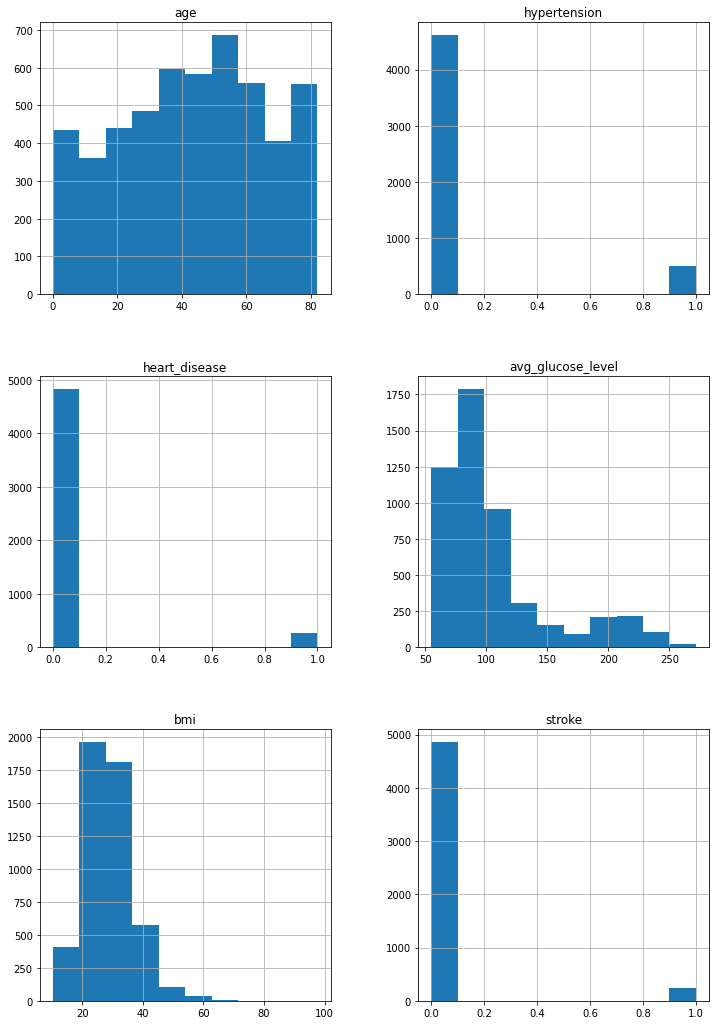

In [37]:
data.hist(figsize=(12, 18))
pyplot.show()

# Density Plots

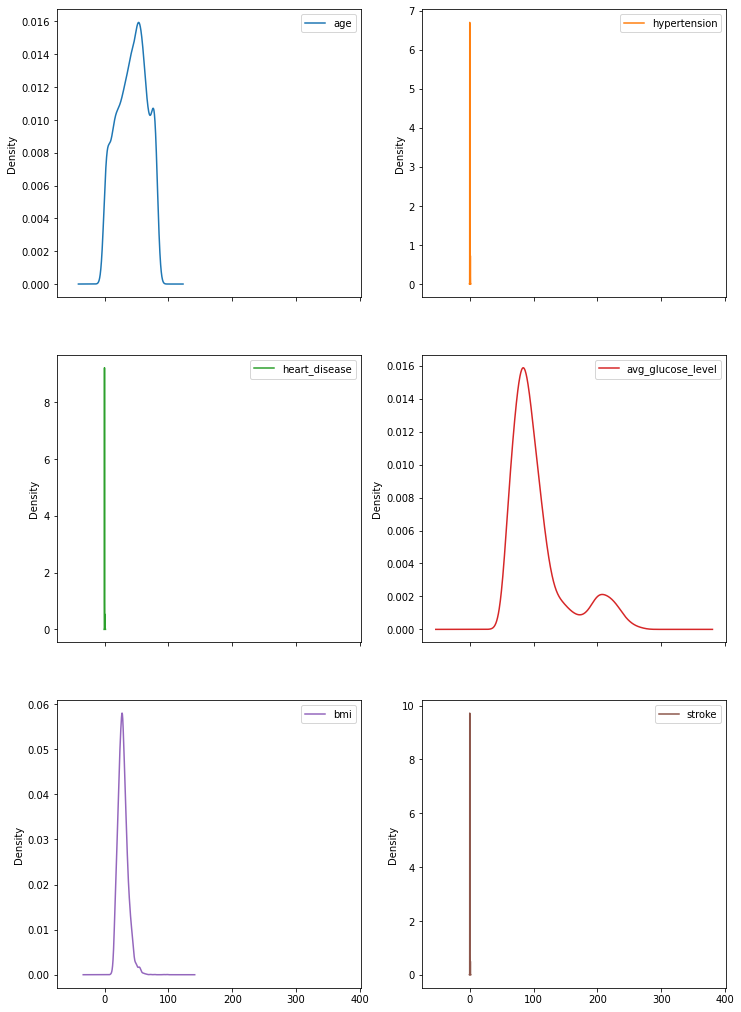

In [36]:
data.plot(kind='density', subplots=True, layout=(3,2), figsize=(12, 18))
pyplot.show()

# Box and Whisker Plots

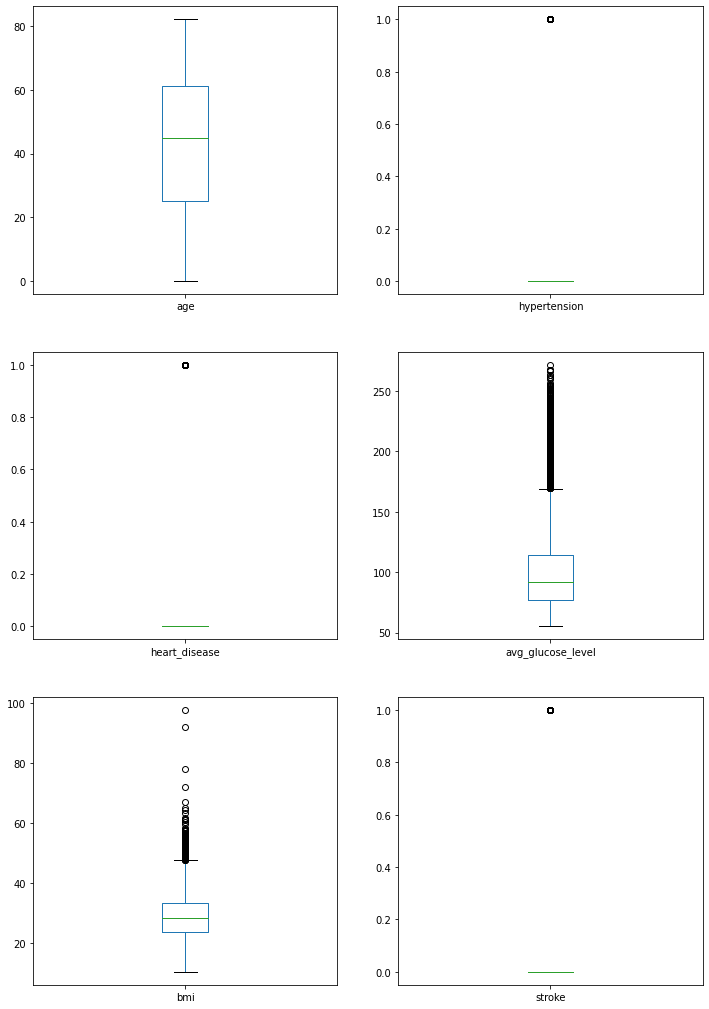

In [39]:
data.plot(kind='box', subplots=True, layout=(3, 2), figsize=(12, 18))
pyplot.show()

# Correlation Matrix Plot

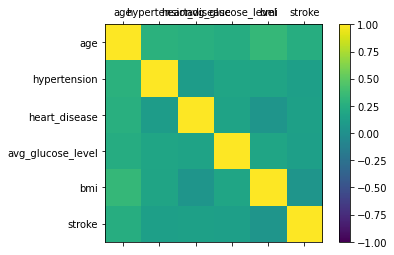

In [58]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(correlations.shape[1])
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns)
ax.set_yticklabels(correlations.columns)
pyplot.show()

# Scatter Plot Matrix

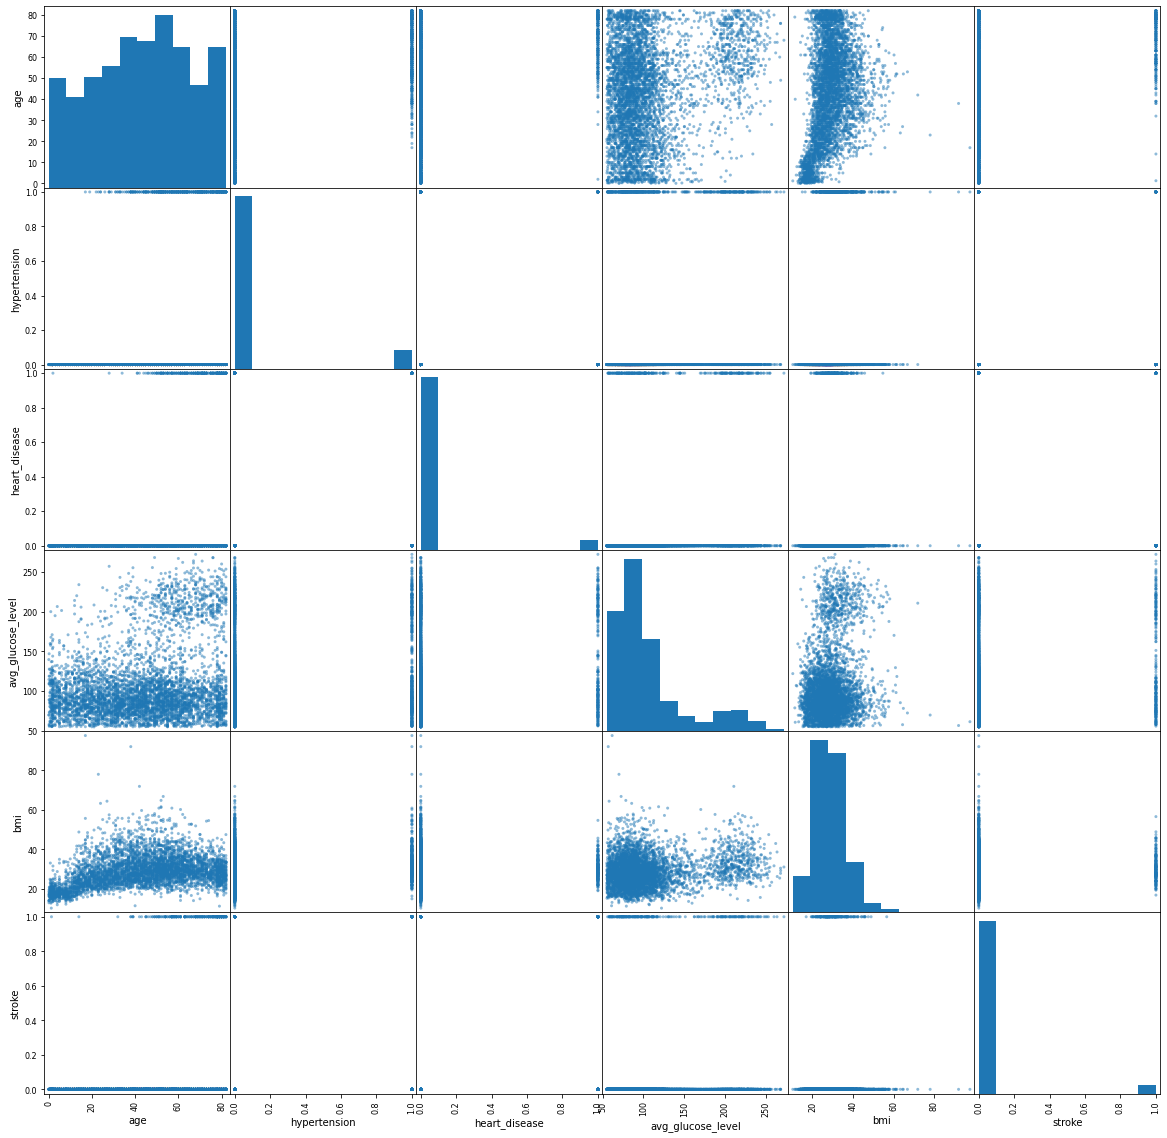

In [51]:
scatter_matrix(data, figsize=(20, 20))
pyplot.show()

# Evaluate the Performance of Machine Learning Algorithms With K-fold Cross Validation

In [9]:
X = data[features]
Y = data[target]
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds)
model = DecisionTreeClassifier(random_state=seed)
result = cross_val_score(model, X, Y, cv=kfold, scoring=None)
print("Accuracy: %.3f%% (%.3f%%)" % (result.mean() * 100.0, result.std()*100.0))

Accuracy: nan% (nan%)


/home/tran/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tran/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tran/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/tran/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/tran/.local/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/tran/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/tran/.local/lib/python3.8/site-pa

# Algorithm Evaluation Metrics

## Classification Metrics

Classification Accuracy is only suitable when there are an equal number of observations in each class.
```
scoring = 'accuracy'
```

Logarithmic Loss
```
scoring = 'neg_log_loss'
```

Area Under ROC Curve
```
scoring = 'roc_auc'
```

Confusion Matrix
```
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
```

Classification Report
```
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
```

# Regression Metrics




